In [ ]:
import numpy as np
import cv2 as cv2
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline

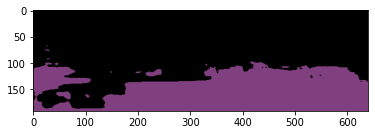

In [ ]:
testim = cv2.imread('seg_img_690.png')
imshow(testim)

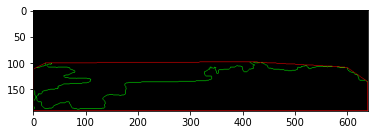

In [ ]:
img_gray = cv2.cvtColor(testim, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
contours = sorted(contours, key=cv2.contourArea)
hull = []
for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color_contours = (0, 255, 0)
color = (255, 0, 0)
cv2.drawContours(drawing, contours, len(contours)-1, color_contours, 1, 8, hierarchy)
cv2.drawContours(drawing, hull, len(contours)-1, color, 1, 8)
imshow(drawing)

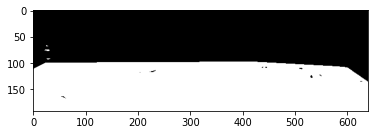

In [ ]:
img_gray = cv2.cvtColor(testim, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
contours = sorted(contours, key=cv2.contourArea)
hull = []
for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
cv2.fillPoly(drawing, pts =hull, color=(255,255,255))
cv2.fillPoly(drawing, pts =contours, color=(255,255,255))
imshow(drawing)

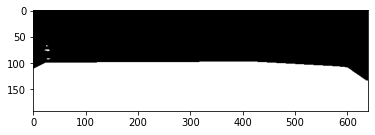

In [ ]:
img_gray = cv2.cvtColor(testim, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
contours = sorted(contours, key=cv2.contourArea)
hull = []
for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
cv2.fillPoly(drawing, pts =hull, color=(255,255,255))
cv2.fillPoly(drawing, pts =contours, color=(255,255,255))
img_dilation = cv2.dilate(drawing, np.ones((5,5), np.uint8), iterations=1)
img_erosion = cv2.erode(img_dilation, np.ones((5,5), np.uint8), iterations=1)
imshow(img_erosion)

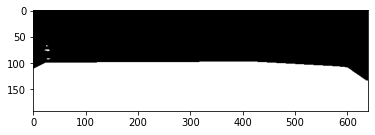

In [ ]:
# Final ROI Function
import numpy as np
import cv2 as cv2
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline


def ROI(image):
  try:
    testim = cv2.imread(image)
    img_gray = cv2.cvtColor(testim, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(thresh, 1, 2)
    contours = sorted(contours, key=cv2.contourArea)
    hull = []
    for i in range(len(contours)):
        hull.append(cv2.convexHull(contours[i], False))
    drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
    cv2.fillPoly(drawing, pts =hull, color=(255,255,255))
    cv2.fillPoly(drawing, pts =contours, color=(255,255,255))
    img_dilation = cv2.dilate(drawing, np.ones((5,5), np.uint8), iterations=1)
    img_erosion = cv2.erode(img_dilation, np.ones((5,5), np.uint8), iterations=1)
  except:
    pass
  return img_erosion


Result = ROI('seg_img_690.png')
imshow(Result)